## ❣️Author's Note
If you like this notebook, consider sharing it to others or give feedback. I would highly appreciate any comments, suggestions and recommendations to improve the notebook.

<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#d9d9d9;overflow:hidden;font-weight:500">LightGBM | Theory & Practice with dataset | Guide  </div>



<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>
<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is LightGBM
    - 1.2 Why LightGBM
    - 1.3 Three Question to answer
        
        
- [2. Difference between LightGBM and XGBoost](#2)
    - 2.1 XGBoost profile
    - 2.2 Difference between LightGBM and XGBoost
    
  
- [3. Optimization strategies](#3)
    - 3.1 Reduce splitting points: Histogram algorithm
    - 3.2 Reduce samples: GOSS
    - 3.3 Reduce features: EFB
    - 3.4 Tree generating strategy: Leaf-wise


- [4. Model practice](#4)
    - 4.1 Mainly hyperparameter
    - 4.2 Parameter adjustment in practice

<a id="1"></a>

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Introduction to LightGBM</h1>
<br>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1.1 What is LightGBM
    </h2>
</div>

**LightGBM**, proposed by Microsoft in 2017, is another evolutionary version of the **GBDT** model. It is mainly used to solve the problems encountered by GBDT in massive data, so that it can **be better and faster used in industrial practice**. From the name of LightGBM, we can see that it is a lightweight gradient lifting machine (GBM). Therefore, in the face of large-scale data sets, LightGBM is still very calm and lighter.

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1.2 Why LightGBM
    </h2>
</div>

When it comes to the well-performed ML model in the competition, we inevitably think of **XGBoost**. Now that we have an XGBoost, why do we need a Lightgbm? Does Lightgbm have any advantages over xgboost? 

Of course, LightGBM has **made many optimizations on the basis of XGBoost**, which can be seen as an upgraded and enhanced version of XGBoost. **It continues the Ensemble learning method of XGBoost**, but it **pays more attention to the training speed of the model**. 

Compared with xgboost, LightGBM has the characteristics of **1) fast training speed** and **2) low memory usage**. Based on these advantages, lightGBM is becoming more and more popular in both the industry and the competition. 

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1.3 Three Question to answer
    </h2>
</div>

**This kernel will introduce LightGBM by solving three question below:**

1. What's the **difference** between LightGBM and XGBoost?
2. what **optimization strategies** have been made on XGBoost to make LightGBM **achieve faster training speed and lower memory usage**? 
3. How to use LightGBM in python?

<a id="2"></a>

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Difference between LightGBM and XGBoost</h1>
<br>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">2.1 XGBoost profile
    </h2>
</div>



XGBoost is a kind of **Ensemble learning** of **boosting** method. 

Ensemble learning refers to building multiple weak classifiers or regressor to predict the data set, and then ensemble the predicted results of multiple classifiers with **a certain strategy** as the final prediction result.

*ps: two method of Ensemble learning:*

*1. Boosting: each weak model has a dependency relationship and must be serial, such as Adaboost, GBDT, XGBoost*

*2. Bagging: each weak model has no dependency relationship, but can be parallel, such as random forest*

**According to the example in Chen Tianqi's XGBoost paper**



Suppose we want to **predict the willingness of everyone in this family to play the game**. We used XGboost to solve this problem. First, we trained **the first decision tree**, predicted that the boy's willingness to play the game was 2, and then found that it was a **little less** than the standard answer. Then we trained **the second decision tree**, predicted that the boy's willingness to play the game was 0.9, and **the final answer** was 2.9. This is close to the standard answer. Therefore, XGBoost is the final conclusion that the weak classification results are accumulated after training.

In fact, if we do not consider some differences in engineering implementation and problem solving, the major difference between XGBoost and gbdt is the **definition of the loss function**, but they are **similar in strategy**, both of them are **focused residuals** (more accurately, xgboost is actually an engineering implementation of the GBDT algorithm)

**In short**, XGBoost realizes the generation of weak classifications by optimizing the structured **loss function** (sometimes adding the **regularization** to reduce the risk of overfitting). XGBoost does not use the search method, but directly uses the **first and second derivatives of the loss function**, and greatly improves the performance of the algorithm through **pre ordering**, weighted quantile and other technologies.

*(The detailed introduction to XGBoost will be expanded in the kernel in the future)*

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">2.2 Difference between LightGBM and XGBoost
    </h2>
</div>


As mentioned in the previous paragraph, xgboost belongs to the boosting family and is an engineering implementation of the GBDT algorithm. It focuses on **residuals in the training process** of the model, **uses second-order Taylor expansion** and **adds regularization** to the objective function, uses the **precise greedy idea** in the **generation process** of the decision tree, and uses the **pre sorting algorithm** when looking for the **best split point**, Pre order all features according to the value of the feature, then traverse all split points on all features, calculate the **GAIN** function of all candidate split points as object function, find the best feature and candidate split points corresponding to the maximum gain, and split. The tree building process is completed **layer by layer**. When xgboost is trained, it is trained by adding, in other words, each time a tree is trained by focusing on the residual, and the final prediction result is the sum of all trees.

We found that xgboost performs pre sorting on the selection of optimal split points, and then **calculates the GAIN function of all samples split according to all split points of all features**. Is this seems to be too much time-consuming and space consuming?

However, doesn't xgboost have an **approximate segmentation algorithm**? This means that the split points are divided into buckets, so that we can traverse fewer split points? Correct, the idea of histogram has been reflected in xgboost, but it has some effects in lightGBM, which can reduce point calculation. Lightgbm histogram algorithm has been better optimized (specifically described below), which is much faster than xgboost. And although XGBoost with buckets strategy only needs to traverse several possible split nodes each time, and then compare the GAIN function of each split node, finally select the largest one for segmentation, it is still difficult to consider the GAIN function brought by all samples when comparing. So based on the complexity of xgboost in finding the optimal split point, we summarized the following three points:

**The complexity of xgboost to find the optimal splitting point = Number of features × Number of splitting points × Number of samples**

**1. To reduce the number of features --> EFB(Exclusive Feature Bundling)**

**2. To reduce the number of splitting points --> Histogram Algorithm of LightGBM**

**3. To reduce the number of samples --> GOSS(Gradient-based One-Side Sampling)**

<a id="3"></a>

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Optimization strategies</h1>
<br>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.1 Reduce splitting points: Histogram algorithm
    </h2>
</div>

The histogram algorithm **divide the floating features into k integers** (same as the idea of bucket bins), for example, set features between [0, 0.1) as 0, [0.1, 0.3) as 1... [0.9,1] as k.

And the **gradient accumulation** and **cumulative statistics** are carried out according to the bin of the feature. When traversing the data, the discretized value is used as the index to cumulative statistics in the histogram. After traversing the data once, the histogram accumulates the required statistics, and then traverses to find the optimal segmentation point according to the discrete value of the histogram.

we can draw a graph again Let's take a continuous feature to see how to divide barrels:

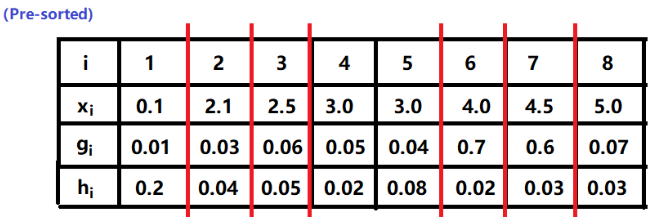

 (i **is Sample Number**, x_i **is Sample characteristic value**, g_i **is First derivative of sample**, h_i **is Second derivative of sample**)
 
**(Each different value is cut as a candidate segmentation point, so the number of possible candidate segmentation points is equal to the different value of the sample - 1)**


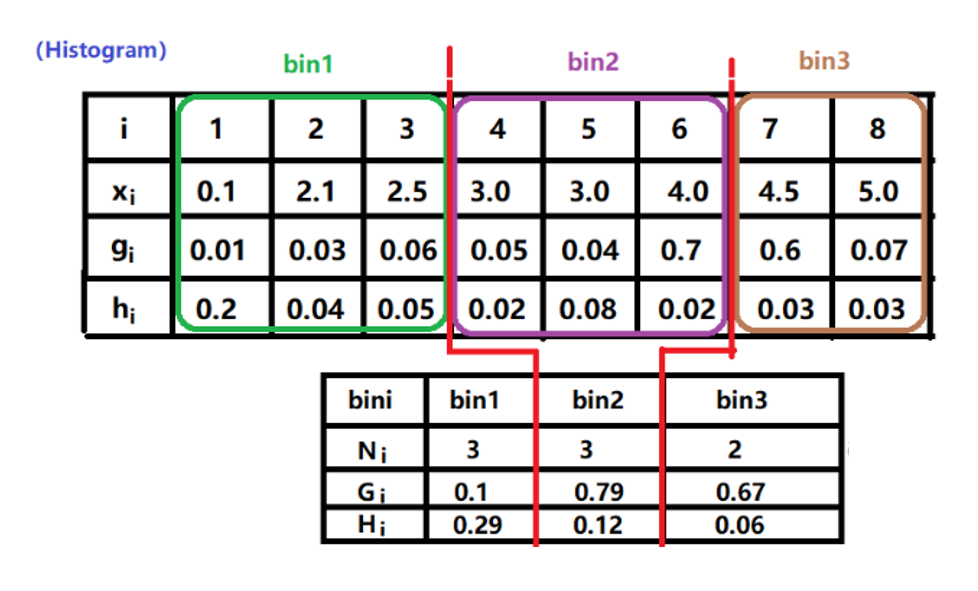

**(N is number of bins**, G_i **is sum of First derivative of sample in each bin**, H_i **is sum of Second derivative of sample in each bin)**

**(The number of possible candidate splitting points is equal to the number of bins-1)**

In this way, when traversing the feature, we only need to search the optimal partition point according to the discrete value of the histogram. Since the number of bins is far less than the number of different values of the sample, the number of split points to be traversed after bucket splitting will be much less, which can reduce the computation. 

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.2 Reduce samples: GOSS
    </h2>
</div>

GOSS (Gradient based One Side Sampling) is to eliminate most of the samples with small weight from the perspective of reducing samples, and only use the remaining samples to calculate the information gain. It is a balanced algorithm in reducing data and ensuring accuracy.

As we all know, there is no weight of the original sample in GBDT. Since Lightgbm is a variant of GBDT, there should be no weight of the original sample. How can we exclude most samples with small weight? In GBDT, there is no sample weight like that in Adaboost. Every data in GBDT will have different gradient values. Samples with small gradient and small training error indicate that the data has been well learned by the model. In the process of training the new model, the samples with small gradient have not much effect on reducing the residual error. Therefore,**we can focus on the samples with high gradient, which will reduce the calculation amount**.

**GOSS algorithm reserves the samples with large gradient and randomly samples the samples with small gradient. In order not to change the data distribution of the samples, a constant is introduced for the samples with small gradient to balance when calculating the gain.**


**Process**:

First, sort all the values of the features to be split in descending order of absolute value size (xgboost is also sorted, but LightGBM does not need to save the sorted results), and then get the samples with **large gradient of the first a%** and **b% of the remaining samples**. When calculating the gain, the latter b% **magnifies the weight of (1-a)/b**. On the one hand, the algorithm **pays more attention to the samples with insufficient training**, on the other hand, it **prevents the sampling from causing too much impact on the distribution of the original data** by multiplying weights.

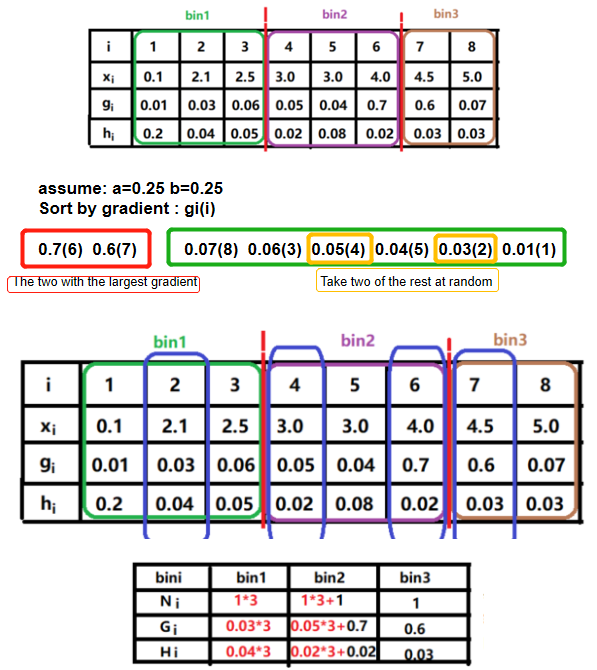

**The red part is the result after the remaining n * b% samples are magnified (1-a)/b**

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.3 Reduce features: EFB
    </h2>
</div>

High dimensional data is often sparse, which inspired us to design a lossless method to reduce the dimension of features. Usually, **the bundled features are mutually exclusive**, so that the two features will not lose information when bundled. If two features are not completely mutually exclusive, one indicator can be used to measure the degree of non mutual exclusion of features, which is called conflict ratio. When this value is small, we can choose to bind the two features that are not completely mutually exclusive without affecting the final accuracy.

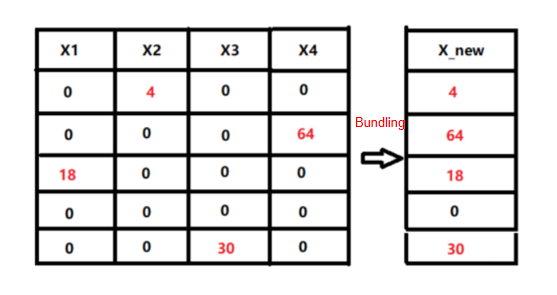

You can see that the above features are sparse enough (most of them are 0), and each feature has only one training sample that is non-zero and not the same training sample, so there is no conflict between features. In this case, these four features can be bundled into one, so that the dimensions will be reduced. (Do you feel that this matrix is very familiar,from right to left it just like one-hot)

* Q1:How to determine which features should be tied together?

EFB algorithm constructs a weighted undirected graph by using the relationship between features and features, and converts it into a graph coloring problem to solve. This is a weighted undirected graph.

*     First, regard all features as vertices of the graph, and connect the features that are not mutually independent with one edge. The weight of the edge is the total conflict value of the two connected features.

*     Second, the features are sorted in descending order according to the degree of nodes. The greater the degree, the greater the conflict with other features

*     Finally, traverse the existing feature cluster. If it is found that the contradiction number of the feature added to the feature cluster does not exceed a certain **contradiction threshold**, add the feature to the cluster. If the feature cannot be added to any existing feature cluster, create a new cluster and add the feature to the new cluster.

For example:

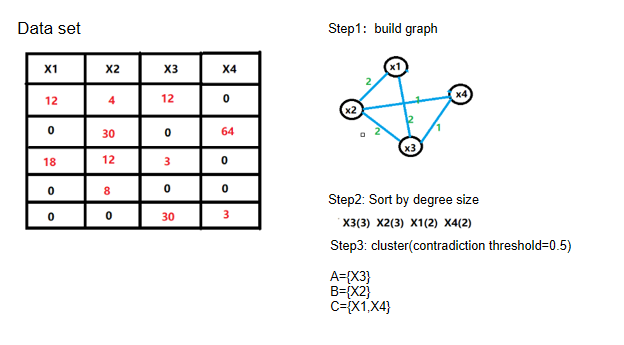

After binding

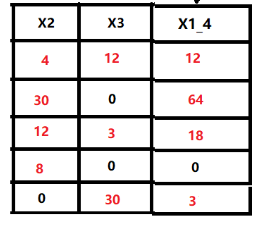

* Q2:After the features are tied together, how should the feature values be determined?

One of the keys is that the original features can be separated from the merged features. Binding several features in the same bundle needs to ensure that the original feature values before binding can be identified in the bundle. Considering that the histogram algorithm saves continuous values as discrete bins, we can divide the values of different features into different bins in the cluster, which can be solved by adding an **offset constant** to the feature values.

For example, we bind feature A and B to the same bundle, The original value range of A feature is [0,10 ), and that of B feature is [0,20). If you bind it directly, you will find that I take a value of 5 from the bundle, and it is impossible to tell whether this 5 is from feature A or feature B. So we can add a constant 10 to the value of B feature and convert it to [10,30). Thus, the bound feature value is [0, 30). If I take 5 from the bundle, I will know that it is from feature A. In this way, I can blend feature A and feature B. See the following figure:


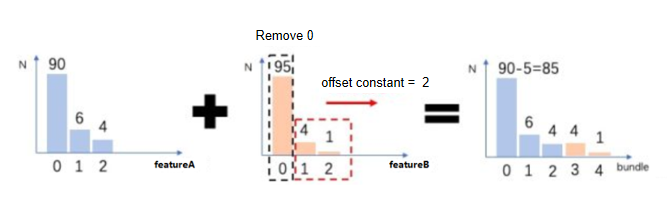


**Overall**,Through EFB, many exclusive features are bundled into fewer intensive features, which greatly reduces the number of features and brings great improvement to the training speed. With this idea, multiple such mutually exclusive features can be bundled into a new feature by recoding the values of some features. Interestingly, for category features, if they are converted to onehot coding, these onehot coded features are mutually exclusive, so they can be bundled into one feature. Therefore, for features designated as category type, LightGBM can directly associate each category value with a bin to automatically process them without preprocessing them into onehot coding.

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">3.4 Tree generating strategy: Leaf-wise
    </h2>
</div>

Lightgbm is optimized not only in the process of finding the optimal split point, but also in the process of tree generation. Instead of level wise in xgboost, it uses leaf wise with depth restrictions.

XGBoost uses the Level wise growth strategy in the tree generation process. This strategy can split the leaves of the same layer at the same time when traversing data once. It is easy to perform multithread optimization, control the complexity of the model, and not easy to over fit. But in fact, **Level wise is an inefficient algorithm** because **it treats leaves at the same level indiscriminately**. In fact, many leaves have low splitting gains, so it is unnecessary to search and split, which brings a lot of unnecessary computational overhead.

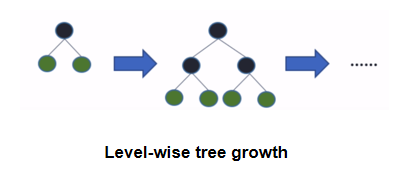

Leaf wise is a more efficient strategy. Each time from all the current leaves, find the one with the largest split gain, and then split, and so on. Therefore, compared with Level wise, if the splitting times are the same, Leaf wise can reduce more errors and obtain better accuracy. The disadvantage of Leaf wise is that it may grow a deep decision tree and generate over fitting. Therefore, LightGBM adds a limit of maximum depth to the Leaf wise to prevent over fitting while ensuring high efficiency.

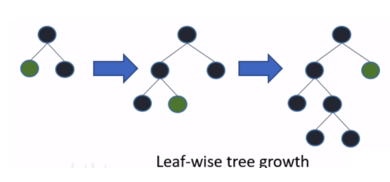

So you should know the advantages of Leaf wise. The Level wise method will generate some nodes with low information gain and waste computing resources, but it is very useful to prevent over fitting. While Leaf wise can pursue better accuracy and reduce errors, it will bring about over fitting problems. Here, max_depth is used to control the height of the tree. In fact, another reason for daring to use Leaf wise is that Lightgbm has the function of natural regularization in various operations such as data consolidation, histogram and GOSS. Therefore, the author feels that it is a good choice to use Leaf wise here to pursue high precision.

<a id="4"></a>

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model practice</h1>
<br>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1 Mainly hyperparameter
    </h2>
</div>

1. learning_ Rate: Generally speaking, the lower the learning rate, the better the final performance of the model will be, but the lower the learning rate will often lead to over fitting of the model and affect the training time of the model. A fixed value such as 0.1 or 0.05 will be preset during parameter adjustment, and then a good value will be searched between 0.05-0.2 as the final model parameter after other parameters are determined. Usually when the learning rate is low, n_estimators is large and the learning rate is high, n_estimators will be smaller.

2. n_estimators:

    1) Generally speaking, the more iterations, the better model performs. However, excessive iterations often lead to over fitting of the model and affect the time of model training. Generally, the value we choose is 100~1000. During training, we need to pay attention to the over fitting so as to adjust the number of iterations in time. Usually through **lgb.plot_Metrics (model, metrics='auc')** to observe the change of the learning curve.
    
    2) In order to prevent over fitting, we usually choose a larger n_estimators, and then set **early_stop_round** value is [20, 50, 100] to stop the model in the test set where the effect is good.
    
    3) Another one is determined by cross test n_estimators. Add **early_stop_round** in training model, record the value of n_estimators when each fold model stops, and then n_estimators is 1.1 times the average number of iterations when the cross test model stops. Then determine this value to adjust other parameters, and finally get the final value of n_estimators through early_stop_round.

3. min_split_Gain: It is not recommended to adjust. Increasing this number will result in a relatively shallow tree depth. Other parameters can be adjusted to achieve similar effects. If you really need to adjust, you can draw the first tree and the last tree. Draw the value of the gain for each decision bifurcation to see the approximate range, and then determine a lower limit. However, the performance of the model will decline a lot after setting.
4. min_child_sample: This parameter needs to be determined according to the data set. Generally, the default 20 is enough for small data sets, but using this 20 for large data sets will result in too small data volume on the generated leaf nodes, which may lead to unrepresentative data sets. Therefore, it is recommended to determine this parameter by 25% of the average number of training data when the tree depth is 4 and there are 16 leaves, or to search slightly in this range. In this way, the stability of the model will be guaranteed.
5. min_child_weight: The function of min_child_weight and min_child_sample is similar, but this parameter itself has little impact on the performance of the model, and the way of impact is not easy to understand by the human brain, so it is not recommended to adjust too much.
6. max_depth: The maximum depth of the tree model. The most important parameter to prevent over fitting is generally limited to 3~5. It is a core parameter that needs to be adjusted, and plays a decisive role in model performance and generalization ability.
7. num_leaves: the number of leaf nodes on a tree. The default settings are 31, and max_ The depth is generally set to a value of (0, 2 ^ max_depth - 1] in combination with the shape of the null value tree. It is a parameter that needs to be adjusted and has a great impact on the model performance.
8. subsample: If this parameter is less than 1.0, LightGBM will randomly select part of the data (row) in each iteration without resampling, which can be used to speed up training and process over fitting. The default setting is 1, and the general setting is 0. 8~1.0 to prevent over fitting.
9. colsample_bytree: If this parameter is less than 1.0, LightGBM will randomly select some features (col) in each iteration, which can be used to speed up training and process over fitting. The default setting is 1, generally between 0.8 and 1.0, to prevent over fitting.
10. reg_alpha: L1 regularization parameter, alias: lambda_l1。 The default setting is 0. Generally, after feature selection, this parameter will not be significantly different. If the value of this parameter is large, it indicates that there are some features that do not play a significant role in the model. Need adjustment to control over fitting
11. reg_lambda: L2 regularization parameter, alias: lambda_l2。 The default setting is 0. Higher values will make the influence of each feature on the model more uniform, and no single feature will control the performance of the whole model. Need adjustment to control over fitting


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.2 Parameter adjustment in practice
    </h2>
</div>

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.1  Import Library
    </h3>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import json
import sklearn
%matplotlib inline

#sklearn library
# 1.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

# 2.preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# 3.metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 4.model
import lightgbm as lgb
from bayes_opt import BayesianOptimization

# 5.plot
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.2  Set  graph environment
    </h3>
</div>

In [2]:
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")
sns.set_palette("Spectral")

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.3  Load Data
    </h3>
</div>

In [3]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.diagnosis=[1 if i =='M' else 0 for i in df.diagnosis.values]
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.4 set features
    </h3>
</div>

In [6]:
#fig,ax = plt.subplots(figsize=(18, 18))
#axes = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
#Simply select the features with a correlation>0.5 with diagnosis
features = list(df.corr()[df.corr()['diagnosis']>0.5].index)
X=df[features]

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.5  Data process
    </h3>
</div>

In [8]:
def process_df(df):    
    #1、Handling null values 
    df=df.dropna()
    
    #2、create y value by using "diagnosis", convert to int type 
    target=df.diagnosis
    df=df[features]
                                                 
    #3、Create the training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, 
                                                    random_state=100,stratify=target)
    
    #4、Obtaining continuous variable 
    numaric_columns=list(df.select_dtypes(include=np.number).columns)
    print("Numaric columns ("+str(len(numaric_columns))+") :",", ".join(numaric_columns))
    
    #5、Obtaining discrete variables 
    cat_columns=df.select_dtypes(include=['object']).columns.tolist()
    print("Categorical columns ("+str(len(cat_columns))+") :",", ".join(cat_columns))
    
    
    #6、Using continuous variable training data 
    X_train_n=X_train[numaric_columns].copy()
    X_test_n=X_test[numaric_columns].copy()
    scaler = MinMaxScaler()
    X_train_n_index = X_train_n.index
    X_test_n_index = X_test_n.index
    
    X_train_n = scaler.fit_transform(X_train_n)
    X_train_n = pd.DataFrame(X_train_n,index=X_train_n_index,columns = numaric_columns)
    
    X_test_n = scaler.transform(X_test_n)
    X_test_n = pd.DataFrame(X_test_n,index=X_test_n_index,columns = numaric_columns)

    #7、Using discrete variable training data 
    X_train_c=X_train[cat_columns]
    X_test_c=X_test[cat_columns]
                               
    #8、Ordinal label processing for discrete variables 
    encoder=OrdinalEncoder()
    X_train_c = encoder.fit_transform(X_train_c)
    
    X_train_c=pd.DataFrame(X_train_c,index=X_train_n.index)
    X_test_c = encoder.transform(X_test_c)
    X_test_c=pd.DataFrame(X_test_c,index=X_test_n.index)
    
    #9、Merge together
    for i,column in enumerate(X_train_c.columns):
        X_train_n["cat_"+str(i+1)]=X_train_c[column]
        X_test_n["cat_"+str(i+1)]=X_test_c[column]

    return X_train_n, X_test_n, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = process_df(df)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Numaric columns (16) : diagnosis, radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst
Categorical columns (0) : 
(455, 16) (114, 16) (455,) (114,)


In [10]:
X_train.diagnosis.value_counts()

0.0    285
1.0    170
Name: diagnosis, dtype: int64

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.6 Bayesian Optimization
    </h3>
</div>

In [11]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold

train_df = X_train
test_df = X_test
target = 'diagnosis'
predictors = train_df.columns.values.tolist()[2:]
bayesian_tr_index, bayesian_val_index = list(StratifiedKFold(n_splits=2,
                                                             shuffle=True, random_state=1).split(train_df, train_df.diagnosis.values))[0]

In [12]:
def LGB_bayesian(
    num_leaves, 
    min_data_in_leaf, 
    learning_rate,
    min_sum_hessian_in_leaf, 
    feature_fraction,
    lambda_l1,
    lambda_l2,
    min_gain_to_split,
    max_depth):
    
    # LightGBM expects next three parameters need to be integer. So we make them integer
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)
    
    param = {
        'num_leaves': num_leaves,
        'max_bin': 63,
        'min_data_in_leaf': min_data_in_leaf,
        'learning_rate': learning_rate,
        'min_sum_hessian_in_leaf': min_sum_hessian_in_leaf,
        'bagging_fraction': 1.0,
        'bagging_freq': 5,
        'feature_fraction': feature_fraction,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'min_gain_to_split': min_gain_to_split,
        'max_depth': max_depth,
        'save_binary': True,
        'seed': 123,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        #'verbose': 1,
        'verbosity': -1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
    }
    xg_train = lgb.Dataset(train_df.iloc[bayesian_tr_index][predictors].values,
                           label=train_df.iloc[bayesian_tr_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False)
    xg_valid = lgb.Dataset(train_df.iloc[bayesian_val_index][predictors].values,
                           label=train_df.iloc[bayesian_val_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False)
    num_round = 5000
    clf = lgb.train(param, xg_train, num_round, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    predictions = clf.predict(train_df.iloc[bayesian_val_index][predictors].values, num_iteration=clf.best_iteration)
    score = metrics.roc_auc_score(train_df.iloc[bayesian_val_index][target].values, predictions)
    return score

<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.7  Find Best parameter
    </h3>
</div>

In [13]:
bounds_LGB = {
    'num_leaves': (5, 20),
    'min_data_in_leaf': (5, 20),
    'learning_rate': (0.01, 0.3),
    'min_sum_hessian_in_leaf': (0.00001, 0.01),
    'feature_fraction': (0.05, 0.5),
    'lambda_l1': (0, 5.0),
    'lambda_l2': (0, 5.0),
    'min_gain_to_split': (0, 1.0),
    'max_depth':(3,15)
}

In [14]:
LGB_BO = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=13)
print(LGB_BO.space.keys)

import warnings
from sklearn import metrics
init_points = 5
n_iter = 5
print('-' * 130)
LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')

['feature_fraction', 'lambda_l1', 'lambda_l2', 'learning_rate', 'max_depth', 'min_data_in_leaf', 'min_gain_to_split', 'min_sum_hessian_in_leaf', 'num_leaves']
----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.986261
|  1        |  0.9863   |  0.4      |  1.188    |  4.121    |  0.2901   |  14.67    |  11.8     |  0.609    |  0.007758 |  14.62    |
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.98733
|  2        |  0.9873   |  0.3749   |  0.1752   |  1.492    

In [15]:
LGB_BO.max['target']

0.9873303167420815

In [16]:
LGB_BO.max['params']

{'feature_fraction': 0.3749082032826262,
 'lambda_l1': 0.17518262050718658,
 'lambda_l2': 1.492247354445897,
 'learning_rate': 0.026968622645801674,
 'max_depth': 13.284731311046386,
 'min_data_in_leaf': 10.592810418122113,
 'min_gain_to_split': 0.679847951578097,
 'min_sum_hessian_in_leaf': 0.002570236693773035,
 'num_leaves': 10.21371822728738}

In [17]:
for key,value in LGB_BO.max['params'].items():
    if key in ['max_depth','min_data_in_leaf','num_leaves']:
        print(key,'=int(',value,'),')
    else:
        print(key,'=',value,',')

feature_fraction = 0.3749082032826262 ,
lambda_l1 = 0.17518262050718658 ,
lambda_l2 = 1.492247354445897 ,
learning_rate = 0.026968622645801674 ,
max_depth =int( 13.284731311046386 ),
min_data_in_leaf =int( 10.592810418122113 ),
min_gain_to_split = 0.679847951578097 ,
min_sum_hessian_in_leaf = 0.002570236693773035 ,
num_leaves =int( 10.21371822728738 ),


<div id = 'job_title'
     style = "display: fill;
              border-radius: 10px;
              background-color: #CE7BB0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.2.8  Train model and metrics
    </h3>
</div>

In [18]:
from sklearn import metrics
model=lgb.LGBMClassifier(
    boosting_type='gbdt',objective='binary',metrics='auc',
    feature_fraction = 0.3749082032826262 ,
    lambda_l1 = 0.17518262050718658 ,
    lambda_l2 = 1.492247354445897 ,
    learning_rate = 0.026968622645801674 ,
    max_depth =int( 13.284731311046386 ),
    min_data_in_leaf = int( 10.592810418122113 ) ,
    min_gain_to_split = 0.679847951578097 ,
    min_sum_hessian_in_leaf = 0.002570236693773035 ,
    num_leaves =int( 10.21371822728738 ))
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("acc:",metrics.accuracy_score(y_test,y_test_pred))
print("auc:",metrics.roc_auc_score(y_test,y_test_pred))

[LightGBM] [Warning] lambda_l1 is set=0.17518262050718658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17518262050718658
[LightGBM] [Warning] min_gain_to_split is set=0.679847951578097, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.679847951578097
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.002570236693773035, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.002570236693773035
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.3749082032826262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3749082032826262
[LightGBM] [Warning] lambda_l2 is set=1.492247354445897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.492247354445897
acc: 1.0
auc: 1.0


<AxesSubplot:title={'center':'test data confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

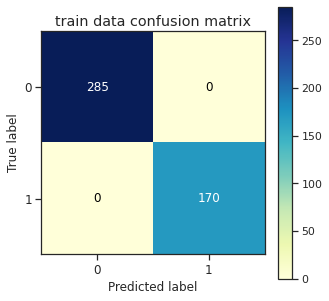

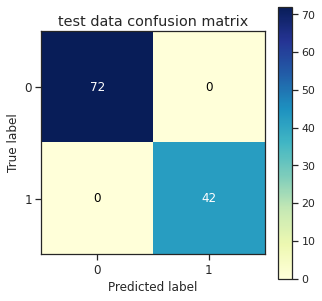

In [19]:
skplt.metrics.plot_confusion_matrix(y_train_pred,y_train,figsize=(5,5), cmap= 'YlGnBu',title='train data confusion matrix')
skplt.metrics.plot_confusion_matrix(y_test_pred,y_test,figsize=(5,5), cmap= 'YlGnBu',title='test data confusion matrix')

<div style="padding:20px;color:white;margin:20;font-size:270%;text-align:center;display:fill;border-radius:5px;background-color:#cc1100;overflow:hidden;font-weight:700">Please <b>UPVOTE</b> if it helped!</div>